# Play Store Apps Analysis
#### Chintan Chitroda

### In This we Analyze the Apps on Playstore and Get the Business insights from them with Respect to Features like:

1. Category
2. Reviews	on playstore
3. Size	of app
4. No ofInstalls	
5. Type	of app
6. Price	of app
7. Content of app
8. Rating	on playstore
9. Android Ver Supported






In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('playstore-analysis.csv', sep=',')

In [0]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [0]:
# Remaning columns for ease access
df.rename(columns={"Android Ver": "Android_ver", 
                   "Current Ver":"Current_ver",
                   "Last Updated" : "Last_updated",
                   "Content Rating": "Content_rating"}, inplace = True)

## Task 1.	Data clean up – Missing value treatment

In [0]:
# Task 1-a
df.dropna(how='any', subset=['Rating'], axis=0, inplace = True)

In [0]:
# Task 1-b-i
df.loc[df.Android_ver.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_rating,Genres,Last_updated,Current_ver,Android_ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [0]:
# Task 1-b-ii
df.drop([10472], inplace = True)

In [0]:
df.loc[df.Android_ver.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_rating,Genres,Last_updated,Current_ver,Android_ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [0]:
#Task 1-b-iii
df['Android_ver'].fillna(df['Android_ver'].mode()[0], inplace=True)

In [0]:
#Task 1-c
df['Current_ver'].fillna(df['Current_ver'].mode()[0], inplace=True)

## Task 2.	Data clean up – correcting the data types

#### Task 2-a Price,Installs,Rating,Reviews need to be changed to numeric data type.

In [0]:
#Task 2-b
col = []
for aa in df['Price']:
    col.append(aa.replace('$','').strip())

df['Price']=col
df['Price']= df['Price'].astype('float')

In [0]:
#Task 2-c
cols = []
for a in df['Installs']:
    cols.append(a.replace(',','').replace('+','').strip())

df['Installs']= cols
df['Installs']= df['Installs'].astype('int')

In [0]:
#Task 2-d
df['Reviews']= df['Reviews'].astype('int')

## Task 3.	Sanity checks – check for the following and handle accordingly

In [0]:
#Task 3-a
df.loc[df.Rating < 1] & df.loc[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_rating,Genres,Last_updated,Current_ver,Android_ver


#### There are no bad values, all records are between 1 and 5.

In [0]:
#Task 3-b
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_rating,Genres,Last_updated,Current_ver,Android_ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [0]:
#Task 3-b-i
temp1 = df[df['Reviews']>df['Installs']].index
print('Dropped',temp1.value_counts().sum(),'records where Rating were more than Installs')
df.drop(labels=temp1, inplace=True)

Dropped 7 records where Rating were more than Installs


In [0]:
df.loc[df['Reviews'] > df['Installs']] #Just a check

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_rating,Genres,Last_updated,Current_ver,Android_ver


## Task 4.	Identify and handle outliers 

In [0]:
#Task 4-a-i
#plt.boxplot(df['Price'])
#plt.show()

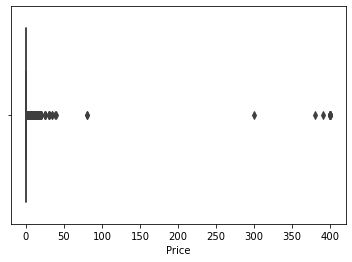

In [0]:
#Task 4-a-i
sns.boxplot(x=df['Price'])

#### There are outliers in Price.

In [0]:
#Task 4-a-ii
df.loc[df['Price'] >= 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_rating,Genres,Last_updated,Current_ver,Android_ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


#### Task 4-a-iii  >> Yes there are apps priced $200 and above available on playstore.

In [0]:
#Task 4-a-iv
gt_30 = df[df['Price'] > 30].index
df.drop(labels=gt_30, inplace=True)
print('Dropped ',len(gt_30),' records having Price more than $30')

Dropped  21  records having Price more than $30


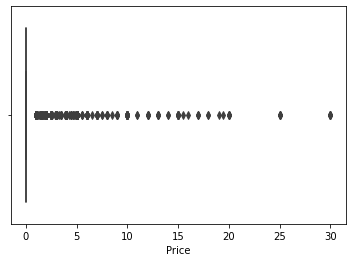

In [0]:
#Task 4-a-iii
sns.boxplot(x=df['Price'])

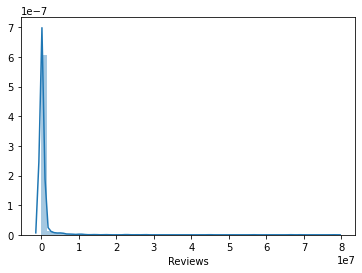

In [0]:
#Task 4-b-i
sns.distplot(df['Reviews'])

#### Plotting Distribution plot for Reviews

In [0]:
#Task 4-b-ii
gt_1m = df[df['Reviews'] > 1000000 ].index
df.drop(labels = gt_1m, inplace=True)
print(gt_1m.value_counts().sum(),'records dropped having more than 10000000 Reviews.')

704 records dropped having more than 10000000 Reviews.


In [0]:
#Task 4-c-i
per = df.Installs.quantile(0.95) #95th Percentile of Installs
print(per,"is 95th percentile of Installs")

10000000.0 is 95th percentile of Installs


In [0]:
#Task 4-c-ii
temp = df[df["Installs"] > per].index
df.drop(labels = temp, inplace = True)
print(temp.value_counts().sum(),'records dropped having value more than 95th Percentile of Installs')

199 records dropped having value more than 95th Percentile of Installs


## Task 5.	

#### What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

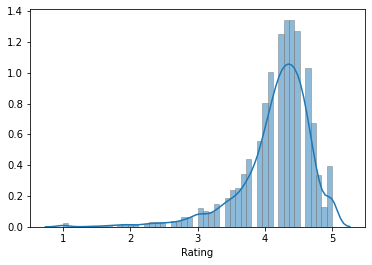

Skewess of the Distribution is -1.7434270330647985
Mean of Distribution is 4.170800237107292 & Median of Distribution is 4.3 which is greater than mean


In [0]:
#Task 5-a
sns.distplot(df['Rating'], hist_kws={'edgecolor':'grey','alpha':.5})
plt.show()
print('Skewess of the Distribution is',df['Rating'].skew())
print('Mean of Distribution is',df['Rating'].mean(),'& Median of Distribution is',df['Rating'].median(),"which is greater than mean")

#### Task 5-b >> Distribution is more skewed towards left and The highest ratings are between 4 and 5.

## Task 6.	What are the top Content Rating values?

In [0]:
#Task 6-a
df['Content_rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content_rating, dtype: int64

#### 'Adults only 18+' and 'Unrated' are values with very few records so we drop them

In [0]:
# Task 6-b
temp = df[(df["Content_rating"].isin(['Adults only 18+', 'Unrated']))].index
df.drop(labels=temp, inplace=True)
print('Droped cols Adults only 18+ and Unrated at',temp)

Droped cols Adults only 18+ and Unrated at Int64Index([298, 3043, 6424, 8266], dtype='int64')


In [0]:
df['Content_rating'].value_counts() # Just a Check

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content_rating, dtype: int64

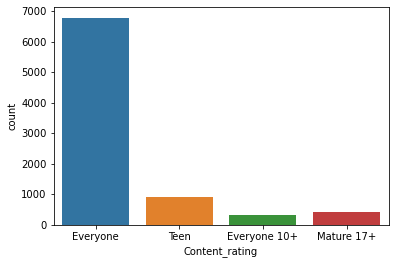

In [0]:
sns.countplot(x='Content_rating' ,data=df)

## Task 7.	Effect of size on rating

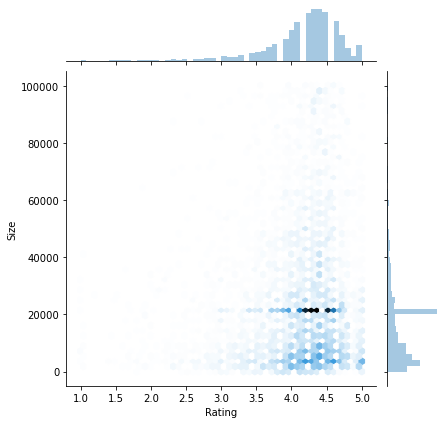

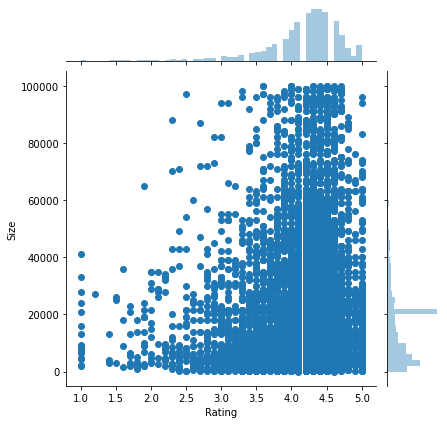

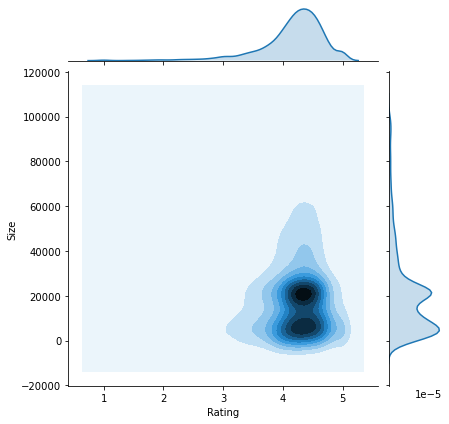

In [0]:
#Task 7-a
sns.jointplot(y ='Size', x ='Rating', data = df, kind ='hex') and sns.jointplot(y ='Size', x ='Rating', data = df) and sns.jointplot(y ='Size', x ='Rating', data = df, kind ='kde')
plt.show()

#### Task 7-b  >> We see that the small size apps has higher/more Ratings in compare to large size apps.

#### Task 7-c >> The density is higher at lower sizes and higher ratings.

## Task 8.	Effect of price on rating

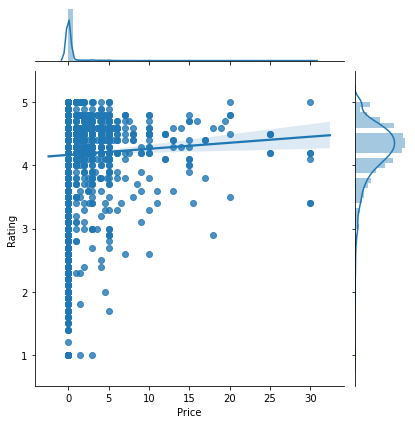

In [0]:
#Task 8-a
sns.jointplot(y ='Rating', x ='Price', data = df, kind ='reg')

#### Task 8-b >> Lower price or 0 price has the higest and most numbers of rating 

#### Task 8-c >>  Density is highest at 0 price and regression line passes by rating between 4-5 in slight increasing order. This shows us there is a weak coorelationship between rating and price

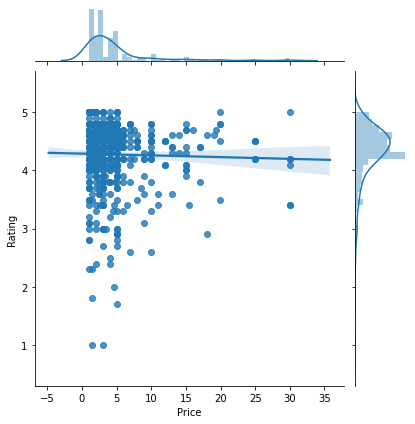

In [0]:
#Task 8-d
df1 = df.loc[df['Price'] > 0]
sns.jointplot(y = df1['Rating'] , x =df1['Price'], kind ='reg')

#### Task 8-e >> Yes, there is change in pattern without free apps/apps with price 0.

#### Task 8-f >> According to analysis the lower prices or free apps has high/more number of ratings in compare to priced apps.The regression line stays almost horizontal with apps with price 0.

## Task 9. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

In [0]:
import warnings
warnings.filterwarnings("ignore")

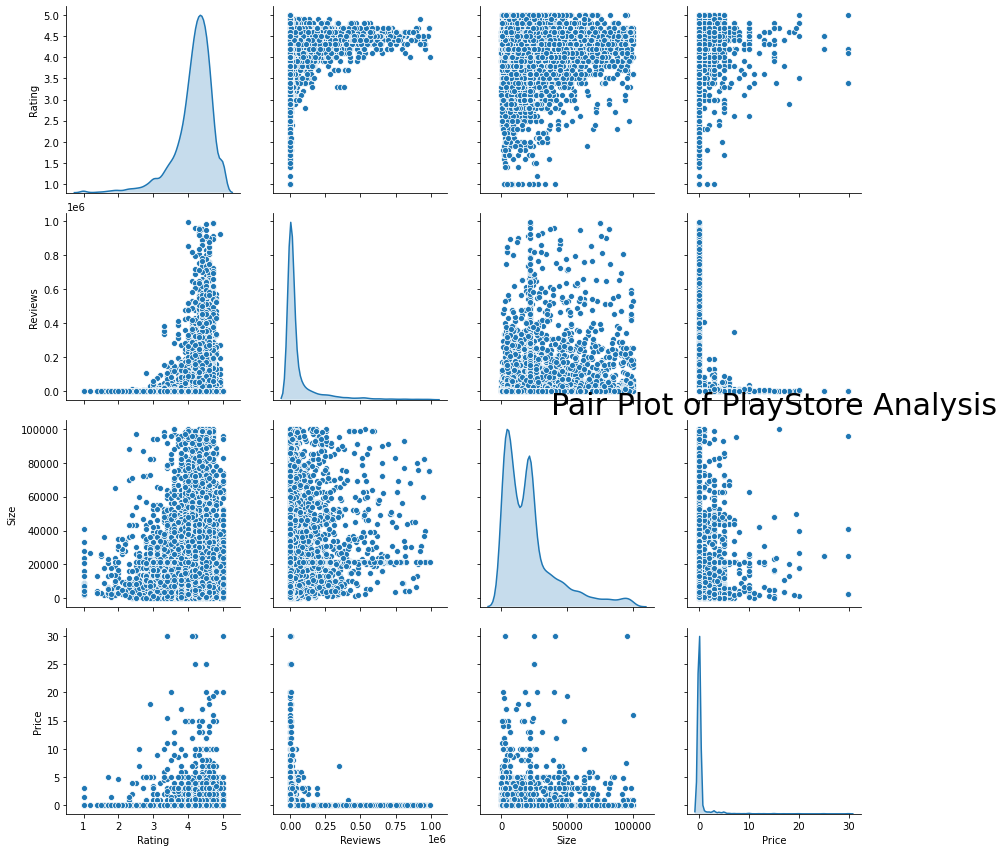

In [0]:
#Task 9
df1 = (df.drop(columns = ['App', 'Category','Installs','Type','Content_rating','Genres','Last_updated', 'Current_ver' ,'Android_ver']))
sns.pairplot(df1, size=3, diag_kind='kde')
plt.title('Pair Plot of PlayStore Analysis',size=30);
plt.show()

## Task 10.	Rating vs. Content rating

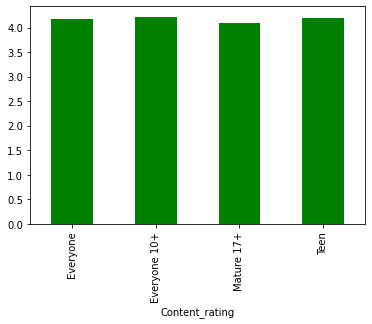

In [0]:
# Task 10-a
df.groupby(['Content_rating'])['Rating'].mean().plot.bar(color=["green"])

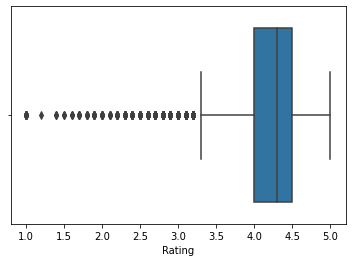

In [0]:
#Task 10-b
sns.boxplot(df['Rating'])

#### As there are outliers, we will use median.

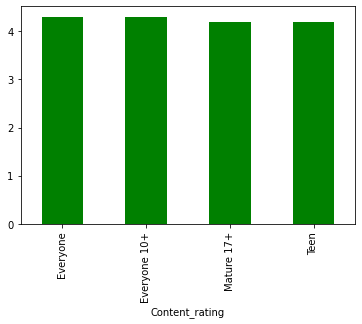

In [0]:
#Task 10-c
df.groupby(['Content_rating'])['Rating'].median().plot.bar(color=["green"])

## Task 11.	Content rating vs. size vs. rating – 3 variables at a time

In [0]:
#Task 11-a
bins = [0,20000,40000,60000,80000,100000]
df['size_bucket'] = pd.cut(df['Size'],bins,labels=['0-20k','20-40k','40-60k','60-80k','80-100k'])
#df.head()

In [0]:
#Task 11-b
pd.pivot_table(df, values='Rating', index=['size_bucket'], columns='Content_rating', aggfunc= lambda x: np.quantile(x,0.2))

Content_rating,Everyone,Everyone 10+,Mature 17+,Teen
size_bucket,,,,
0-20k,3.80,4.02,3.5,3.9
20-40k,4.00,4.00,4.0,3.9
40-60k,3.90,4.06,4.1,4.0
60-80k,4.00,4.00,4.0,4.0
80-100k,4.04,4.10,4.0,4.0


In [0]:
#Task 11-b works but not that effective
#df1 = df.groupby(['Content_rating','size_bucket'])['Rating'].quantile(.2)
#df1.unstack(level= 0)

Text(0.5, 1.0, '20th Percentile Rating for each Combination')

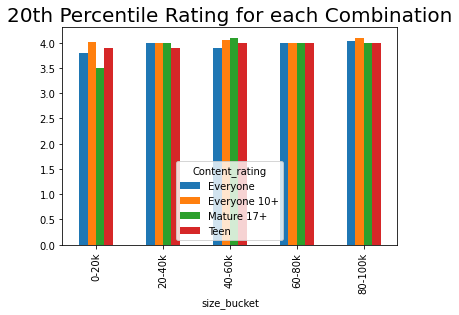

In [0]:
pd.pivot_table(df, values='Rating', index=['size_bucket'], columns='Content_rating', aggfunc= lambda x: np.quantile(x,0.2)).plot.bar()
plt.title('20th Percentile Rating for each Combination', size=20)

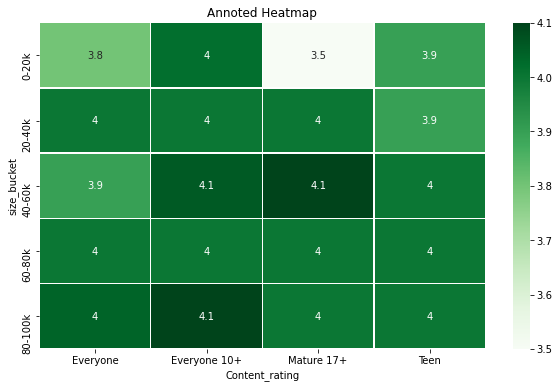

In [0]:
#Task 11-c
heatmap1 = pd.pivot_table(df, values='Rating', index=['size_bucket'], columns='Content_rating', aggfunc=lambda x: np.quantile(x,0.2))
plt.subplots(figsize=(10, 6))
plt.title('Annoted Heatmap')
sns.heatmap(heatmap1, annot=True, cmap="Greens", linewidths=.5)

#### Task 11-d >> According to analysis and heatmap output, heavier apps or apps with size range between 40k-60k and 80k-100k are preferred in all categories.

## Thank You

## Quick tasks to answer some business Questions

In [0]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.204667,0.736038,-0.073446
Size,0.058076,0.204667,1.000000,0.190741,-0.001054
Installs,0.118414,0.736038,0.190741,1.000000,-0.110507
Price,0.031479,-0.073446,-0.001054,-0.110507,1.000000


In [0]:
binss = [0.0,5.0,10.0,15.0,20.0,25.0,30.0]
df['price_bucket'] = pd.cut(df['Price'],bins=binss, labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

In [0]:
df['Installs'].value_counts()

1000000     1576
10000000    1177
100000      1149
10000       1004
5000000      752
1000         704
500000       536
50000        465
5000         429
100          307
500          201
10            67
50            56
5              8
Name: Installs, dtype: int64

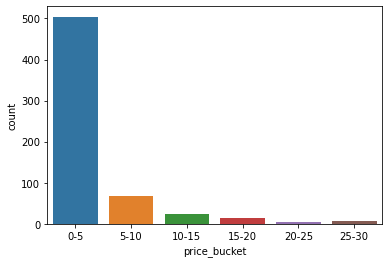

In [0]:
sns.countplot(x='price_bucket',data=df)

# Overall Conclusion

##### According to the above analysis we see that Price has the biggest impact on the App downloads.

#### For detialed short Analysis  see the PPt Attached